In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = np.array([[2.2, 6.3, 9.0, 8.8],
                 [3.8, 5.5, 2.5, 6.0],
                 [7.0, 7.0, 7.9, 4.2],
                 [9.5, 5.3, 9.0, 1.8]])

In [3]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

In [4]:
cov_matrix = np.cov(data_standardized, rowvar=False)

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [6]:
eigenvalue_eigenvector_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]

In [8]:
eigenvalue_eigenvector_pairs.sort(key=lambda x: x[0], reverse=True)

In [9]:
num_components = 2
selected_eigenpairs = eigenvalue_eigenvector_pairs[:num_components]

In [10]:
projection_matrix = np.column_stack((selected_eigenpairs[0][1], selected_eigenpairs[1][1]))

In [11]:
data_pca = data_standardized.dot(projection_matrix)

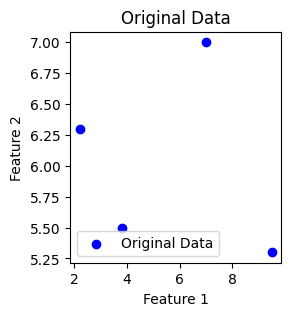

In [17]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)

plt.scatter(data[:, 0], data[:, 1], c='b', label='Original Data')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.title('Original Data')
plt.legend()

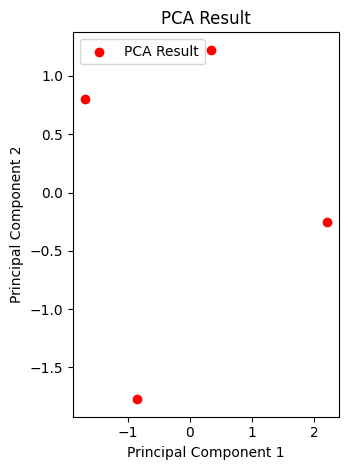

In [18]:
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='r', label='PCA Result')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.legend()

plt.tight_layout()
plt.show()